In [13]:
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2
import os
from sklearn.model_selection import train_test_split

tf.config.experimental.list_physical_devices('GPU')
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
data = np.empty((2000, 224, 224, 1), dtype="float32")
image_label = []

j = 0

not_good_dir = 'D:/ChromeDownload/screws/archive/train/not_good_sample/'
for img in os.listdir(not_good_dir):
    img_name = 0
    image = Image.open(not_good_dir+ img, 'r')
    arr = np.asarray(image, dtype="float32")
    arr = cv2.resize(arr, (224, 224),interpolation = cv2.INTER_LINEAR)
    data[j, :, :, 0] = arr
    j = j+1
    image_label.append(img_name)

good_dir = 'D:/ChromeDownload/screws/archive/train/good_sample/'
for img in os.listdir(good_dir):
    img_name = 1
    image = Image.open(good_dir+ img, 'r')
    arr = np.asarray(image, dtype="float32")
    arr = cv2.resize(arr, (224, 224),interpolation = cv2.INTER_LINEAR)
    data[j, :, :, 0] = arr
    j = j+1
    image_label.append(img_name)

x_train = np.array(data,dtype=np.float32)/255.
y_train = np.array(image_label)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=None, shuffle=True)
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)


[0. 1.]


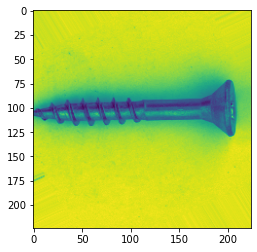

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])
print(y_train[3])

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2), strides=2),

    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 28, 28, 256)      

In [45]:
from tensorflow.keras.optimizers import *
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=50, epochs=50, shuffle=True, validation_data=(x_test, y_test))

model.evaluate(x_test, y_test)

Epoch 1/50
36/36 [==============================] - 5s 146ms/step - loss: 0.6953 - acc: 0.4967 - val_loss: 0.6967 - val_acc: 0.4700
Epoch 2/50
36/36 [==============================] - 5s 137ms/step - loss: 0.6945 - acc: 0.4772 - val_loss: 0.6935 - val_acc: 0.4700

[0.371963232755661, 0.8799999952316284]

In [56]:
model.save('my_model.h5')

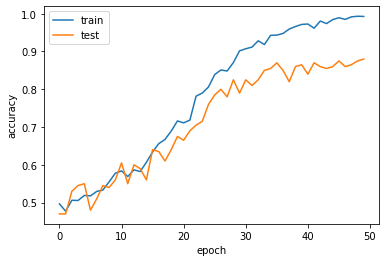

In [46]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [48]:
test_dir = 'D:/ChromeDownload/screws/archive/test/good-test/'
test_arr = np.empty((112, 224, 224, 1), dtype="float32")
k = 0
for img in os.listdir(test_dir):
    image = Image.open(test_dir+ img, 'r')
    arr = np.asarray(image, dtype="float32")
    arr = cv2.resize(arr, (224, 224),interpolation = cv2.INTER_LINEAR)
    test_arr[k, :, :, 0] = arr
    k += 1

In [50]:
pred = model.predict(test_arr)

result = np.zeros(112)
result[:] = pred[:, 0]
j = 0
for i in result:
    if i < 0.5:
        j += 1

j

95